<a href="https://colab.research.google.com/github/majetikalyan007/ML-algorithms/blob/main/One_Neuron_SL_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
X= torch.linspace(0, 10, 50).unsqueeze(1)
print(X)
print(X.shape)

tensor([[ 0.0000],
        [ 0.2041],
        [ 0.4082],
        [ 0.6122],
        [ 0.8163],
        [ 1.0204],
        [ 1.2245],
        [ 1.4286],
        [ 1.6327],
        [ 1.8367],
        [ 2.0408],
        [ 2.2449],
        [ 2.4490],
        [ 2.6531],
        [ 2.8571],
        [ 3.0612],
        [ 3.2653],
        [ 3.4694],
        [ 3.6735],
        [ 3.8776],
        [ 4.0816],
        [ 4.2857],
        [ 4.4898],
        [ 4.6939],
        [ 4.8980],
        [ 5.1020],
        [ 5.3061],
        [ 5.5102],
        [ 5.7143],
        [ 5.9184],
        [ 6.1224],
        [ 6.3265],
        [ 6.5306],
        [ 6.7347],
        [ 6.9388],
        [ 7.1429],
        [ 7.3469],
        [ 7.5510],
        [ 7.7551],
        [ 7.9592],
        [ 8.1633],
        [ 8.3673],
        [ 8.5714],
        [ 8.7755],
        [ 8.9796],
        [ 9.1837],
        [ 9.3878],
        [ 9.5918],
        [ 9.7959],
        [10.0000]])
torch.Size([50, 1])


Epoch 10: Loss = 154.7833, w = 2.7358, b = -0.2701
Epoch 20: Loss = 50.5542, w = 3.6672, b = -0.0936
Epoch 30: Loss = 25.4236, w = 4.1209, b = 0.0112
Epoch 40: Loss = 19.2884, w = 4.3405, b = 0.0809
Epoch 50: Loss = 17.7157, w = 4.4454, b = 0.1332
Epoch 60: Loss = 17.2397, w = 4.4941, b = 0.1769
Epoch 70: Loss = 17.0280, w = 4.5153, b = 0.2163
Epoch 80: Loss = 16.8807, w = 4.5230, b = 0.2535
Epoch 90: Loss = 16.7499, w = 4.5241, b = 0.2896
Epoch 100: Loss = 16.6240, w = 4.5220, b = 0.3250


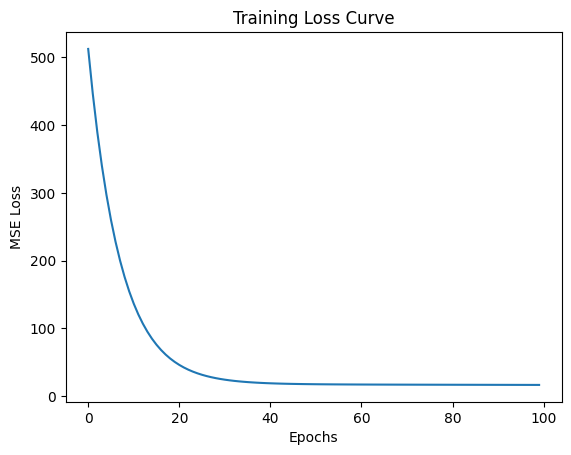

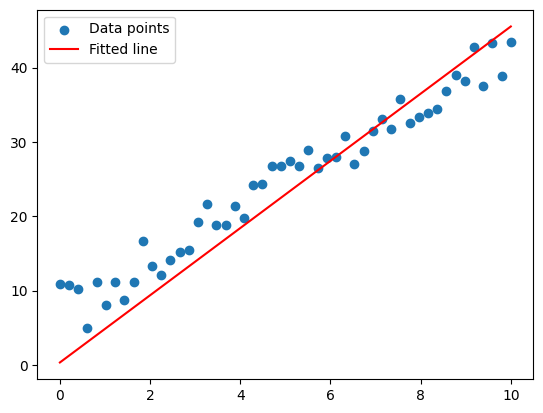

Final model: y = 4.5220 * x + 0.3250


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 1. Create synthetic dataset
torch.manual_seed(42)
X = torch.linspace(0, 10, 50).unsqueeze(1)  # Shape: (50, 1)
y = 3.5 * X + 7  # True relation


# 2. Define Model (One Neuron)

model = nn.Linear(in_features=1, out_features=1)  # y = wx + b


# 3. Define Loss & Optimizer

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)


# 4. Training Loop

epochs = 100
loss_history = []

for epoch in range(epochs):
    # Forward pass
    y_pred = model(X)
    loss = criterion(y_pred, y)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    if (epoch+1) % 10 == 0:
        w, b = model.parameters()
        print(f"Epoch {epoch+1}: Loss = {loss.item():.4f}, w = {w.item():.4f}, b = {b.item():.4f}")


# 5. Plot Loss Curve

plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve")
plt.show()


# 6. Plot Regression Line

predicted = model(X).detach()
plt.scatter(X, y, label="Data points")
plt.plot(X, predicted, color='red', label="Fitted line")
plt.legend()
plt.show()


# 7. Print final parameters

w, b = model.parameters()
print(f"Final model: y = {w.item():.4f} * x + {b.item():.4f}")


In [ ]:
torch.manual_seed(42)
torch.rand(5)

tensor([0.8823, 0.9150, 0.3829, 0.9593, 0.3904])

Epoch 1000: Loss = 0.3364


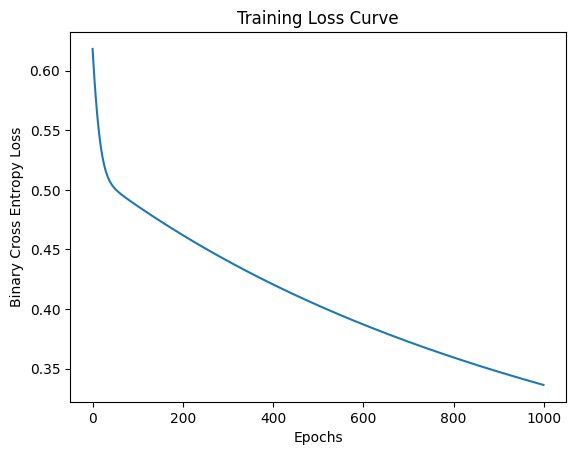

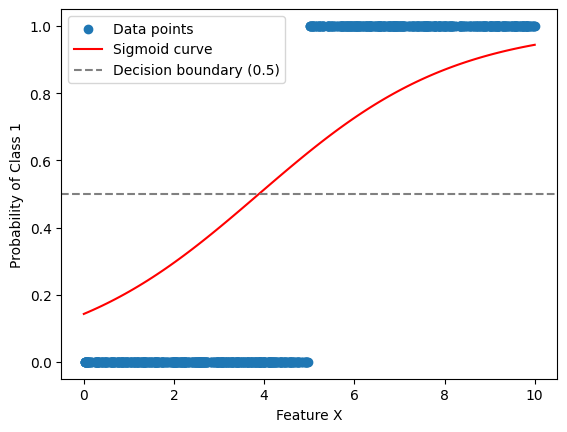

Final model: sigmoid(0.4614 * x + -1.7921)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


# 1. Create synthetic binary classification dataset

torch.manual_seed(42)
n_samples = 1000
X = torch.rand(n_samples, 1) * 10   # Feature from 0 to 10
y = (X > 5).float()                 # Class 1 if x > 5 else Class 0


# 2. Define Model (One Neuron + Sigmoid)

class LogisticNeuron(nn.Module):
    def __init__(self):
        super(LogisticNeuron, self).__init__()
        self.linear = nn.Linear(1, 1)   # One input, one output

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

model = LogisticNeuron()


# 3. Loss & Optimizer

criterion = nn.BCELoss()  # Binary Cross Entropy
optimizer = optim.SGD(model.parameters(), lr=0.01)


# 4. Training Loop

epochs = 1000
loss_history = []

for epoch in range(epochs):
    # Forward pass
    y_pred = model(X)
    loss = criterion(y_pred, y)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    if (epoch+1) % 1000 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss.item():.4f}")


# 5. Plot Loss Curve

plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Binary Cross Entropy Loss")
plt.title("Training Loss Curve")
plt.show()


# 6. Visualize Decision Boundary

x_test = torch.linspace(0, 10, 100).unsqueeze(1)
y_test_pred = model(x_test).detach()

plt.scatter(X, y, label="Data points")
plt.plot(x_test, y_test_pred, color='red', label="Sigmoid curve")
plt.axhline(0.5, color='gray', linestyle='--', label="Decision boundary (0.5)")
plt.xlabel("Feature X")
plt.ylabel("Probability of Class 1")
plt.legend()
plt.show()


# 7. Print final parameters

w, b = model.linear.parameters()
print(f"Final model: sigmoid({w.item():.4f} * x + {b.item():.4f})")


Epoch 400: Loss = 0.3473
Epoch 800: Loss = 0.2804
Epoch 1200: Loss = 0.2642
Epoch 1600: Loss = 0.2576
Epoch 2000: Loss = 0.2537


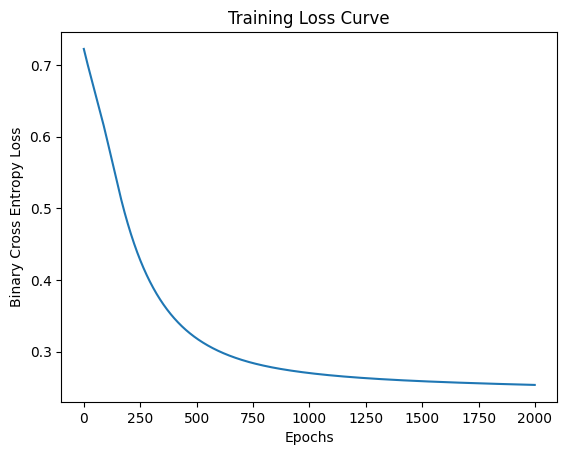

Test Accuracy: 95.00%

Hidden Layer Weights and Bias:
Parameter containing:
tensor([[-0.4192,  0.3088, -0.0505],
        [-2.2425, -0.1740, -0.6165]], requires_grad=True)
Parameter containing:
tensor([-0.2501,  0.6262], requires_grad=True)

Output Layer Weights and Bias:
Parameter containing:
tensor([[ 0.3351, -2.4444]], requires_grad=True)
Parameter containing:
tensor([3.3363], requires_grad=True)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# 1. Generate synthetic dataset (3 features)

X, y = make_classification(n_samples=200, n_features=3, n_informative=3,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Convert to PyTorch tensors
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


# 2. Define Neural Network with 2 hidden neurons

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(3, 2)  # 3 inputs → 2 hidden neurons
        self.output = nn.Linear(2, 1)  # 2 hidden neurons → 1 output neuron

    def forward(self, x):
        x = torch.relu(self.hidden(x))       # ReLU activation in hidden layer
        x = torch.sigmoid(self.output(x))    # Sigmoid activation in output layer
        return x

model = SimpleNN()


# 3. Loss & Optimizer

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)


# 4. Training Loop

epochs = 2000
loss_history = []

for epoch in range(epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    if (epoch+1) % 400 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss.item():.4f}")


# 5. Loss Curve

plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Binary Cross Entropy Loss")
plt.title("Training Loss Curve")
plt.show()


# 6. Evaluate Model

with torch.no_grad():
    y_pred_test = model(X_test)
    predictions = (y_pred_test >= 0.5).float()
    accuracy = (predictions == y_test).float().mean()
    print(f"Test Accuracy: {accuracy.item()*100:.2f}%")


# 7. Show final learned weights

print("\nHidden Layer Weights and Bias:")
print(model.hidden.weight)
print(model.hidden.bias)

print("\nOutput Layer Weights and Bias:")
print(model.output.weight)
print(model.output.bias)
